## Content : 
### 1. Import data and libraries
### 2. Creating Bar Charts
### 3. Exporting Charts
### 4. Creating Histograms and Scatterplots
#### 4.1 Sampling Data
#### 4.2 Line Chart (variation of prices during the week ) for small dataframe

## 1. Import data and libraries

In [34]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [35]:
# Import "ords_prods_merged_grouped" dataframe with last update 
path = r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\07-12-24 Instacart Basket Analysis'
ords_prods_merge =pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_merged_grouped.pkl')) 

## 2. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

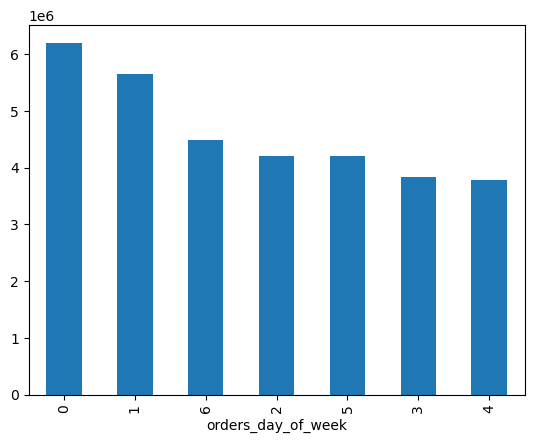

In [36]:
#Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

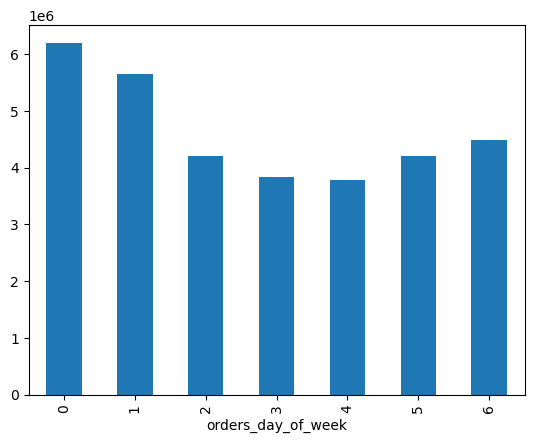

In [37]:
#Create a bar chart with sort_index
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [38]:
# how to use sort_index to frequency count
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [39]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

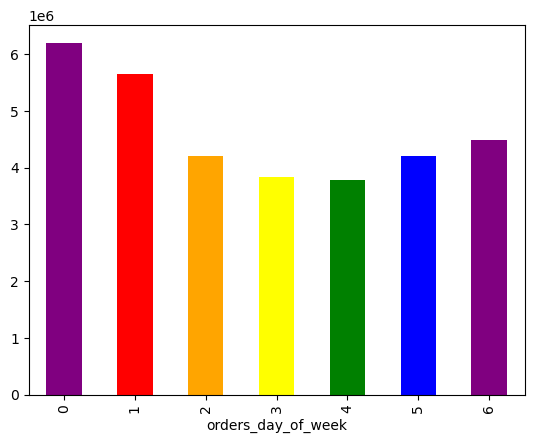

In [40]:
#Using color in plot.bar() function
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','orange','yellow','green','blue'])

## 3. Exporting Charts

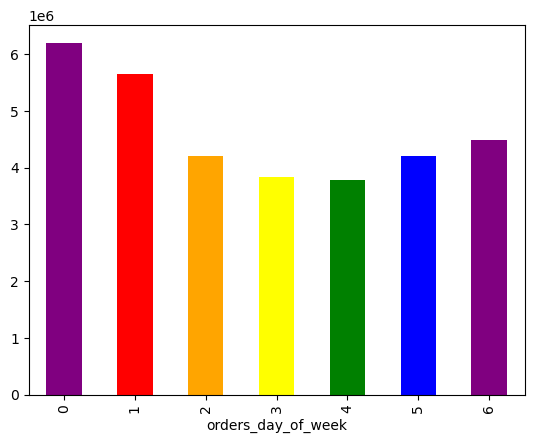

In [41]:
# acces to the bar chart
bar.figure

In [42]:
#Export bar chart using figure.savefig() function
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','bar_orders_dow.png' ))

## 4. Creating Histograms and Scatterplots


<Axes: ylabel='Frequency'>

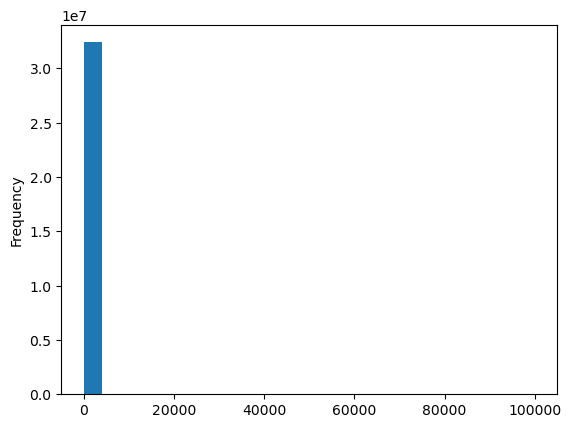

In [43]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [44]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

<Axes: xlabel='prices', ylabel='prices'>

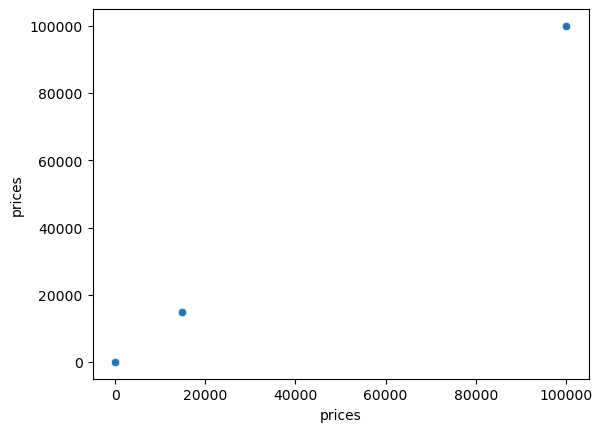

In [45]:
# Exploring data to visualise the distribution  of data points in order to identify outliers using scatterplots
sns.scatterplot(x= 'prices', y= 'prices', data= ords_prods_merge)

In [46]:
# Determining  whether there are any values above $100 
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prods_price,spending_flag,customer_frequency,order_frequency_flag
1576,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
1638,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
16522,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non_frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent Customer
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Least busy,Slowest day,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Average orders,5,New customer,938.031250,High spender,7.0,Frequent Customer


In [47]:
# Display all colunms
pd.set_option('display.max_columns', None)

In [48]:
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prods_price,spending_flag,customer_frequency,order_frequency_flag
1576,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
1638,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
16522,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non_frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent Customer
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Least busy,Slowest day,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular day,Average orders,5,New customer,938.031250,High spender,7.0,Frequent Customer


we oserve that ther are 5127 row with outliers observations for prices greater than $100 , and at the top of prices column we can see that 
there's another odd value 14900.0 which correspond to the second unexplainable point in the scatterplot folwwing by the 99999.00 point founded on the max value. So those values that are skewing charts.

In [49]:
# marking values as missing 
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices']=np.nan

In [50]:
# check the replacement on the max value
ords_prods_merge['prices'].max()

25.0

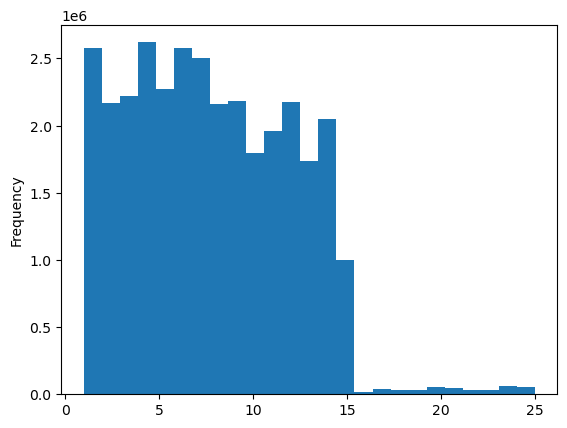

In [51]:
#plotting the histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

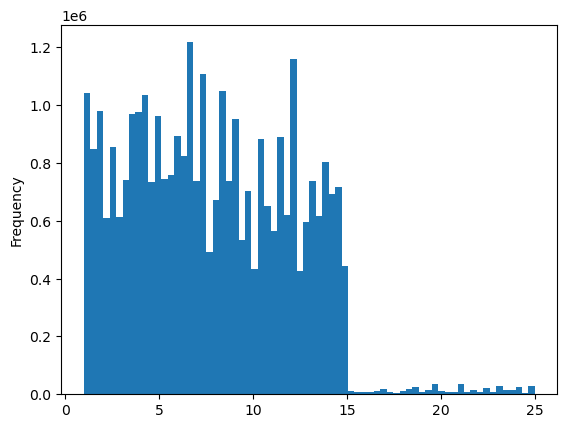

In [52]:
# Incresing the level of granularity in the histogram
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

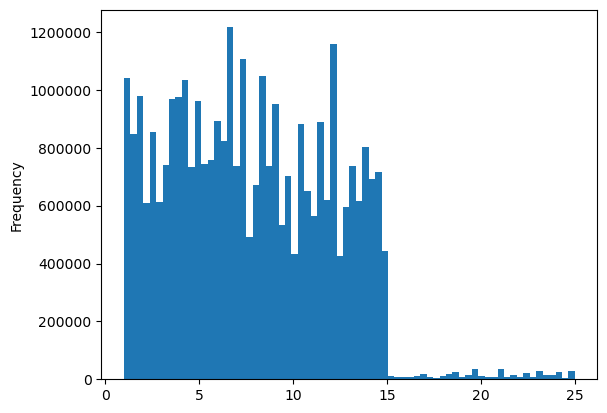

In [53]:
# dropping exponentiel notation on y axis
plt.ticklabel_format(style='plain', axis='y')
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [54]:
# exporting histogram
hist_2.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','hist_prices_frequency.png' ))


## 4. Creating Line Charts

###  4.1 Sampling Data

In [55]:
#Spliting dataframe in two sapmles with the same distribution (split 70/30)
np.random.seed (4)


In [56]:
#Create a list holding True/False values to the test np.random.rand()
dev = np.random.rand(len(ords_prods_merge))<=0.7

In [57]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [58]:
# store 30% of the sample in the dataframe small
small =  ords_prods_merge[~dev]


In [59]:
#verification
len(ords_prods_merge)

32404859

In [60]:
len(big)+ len (small)

32404859

###  4.2 Line Chart (variation of prices during the week ) for small dataframe 

In [61]:
#reducing number of columns to reduce plotting time
df_2= small[['orders_day_of_week','prices']]

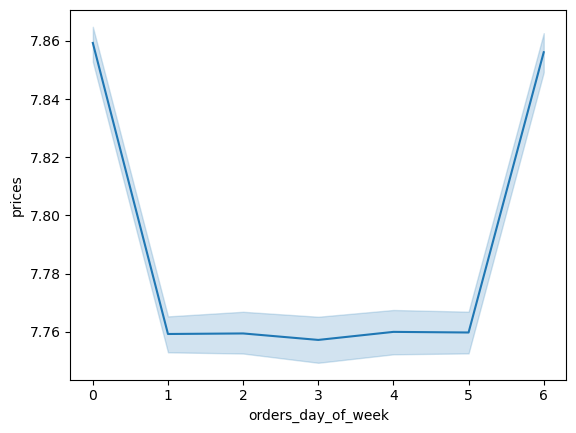

In [62]:
line= sns.lineplot(data=df_2, x='orders_day_of_week',y= 'prices')

In [63]:
# exporting line chart
line.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','line_orders-day-of-week_prices.png' ))


In [64]:
# export corrected dataframe
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged_grouped_corrected.pkl'))